In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import os

# Calculo cientifico y vectorial para python
import numpy as np


# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize


# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [77]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv('/content/drive/MyDrive/Tornadoes_SPC_1950to2015.csv')

# Seleccionar las columnas desde la columna 9 hasta la última (columna 22)
X_train = data.iloc[:48000, 8:-1].values  # Todas las filas, desde la columna 9 hasta la penúltima
y_train = data.iloc[:48000, -1].values    # Todas las filas, última columna
X_test = data.iloc[48001:, 8:-1].values  # Filas desde la 48000 hasta el final, desde la columna 9 hasta la penúltima
y_test = data.iloc[48001:, -1].values    # Filas desde la 48000 hasta el final, última columna

X = X_train
y = y_train
# Verificar las dimensiones de X y y_train
print(X)
print(y)

[[ 2.900e+01  1.000e+00  3.000e+00 ... -9.003e+01  9.500e+00  1.500e+02]
 [ 1.700e+01  2.000e+00  3.000e+00 ... -8.923e+01  3.600e+00  1.300e+02]
 [ 3.900e+01  1.000e+00  1.000e+00 ...  0.000e+00  1.000e-01  1.000e+01]
 ...
 [ 1.200e+01  4.500e+01  0.000e+00 ... -8.167e+01  5.000e-01  3.000e+01]
 [ 2.900e+01  2.300e+01  0.000e+00 ... -9.410e+01  4.000e-01  2.500e+01]
 [ 4.000e+01  2.600e+01  1.000e+00 ... -9.863e+01  4.000e+00  2.500e+02]]
[0 0 0 ... 0 0 0]


In [78]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


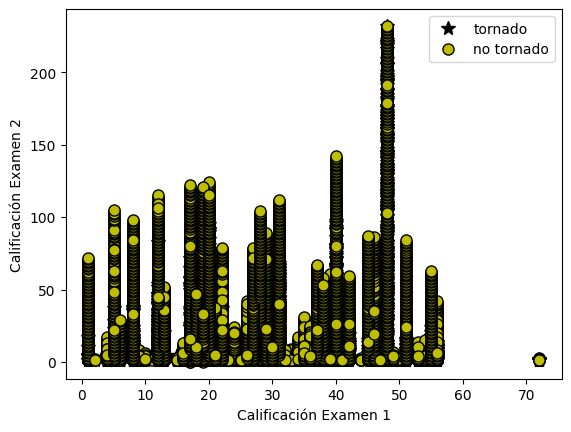

In [79]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Calificación Examen 1')
pyplot.ylabel('Calificación Examen 2')
pyplot.legend(['tornado', 'no tornado'])
pass

In [80]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [81]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [82]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [83]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [84]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [85]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [86]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-3.01884399e+00 -2.78655586e-02 -2.11789658e-02 -1.28467486e-01
 -6.44533950e-03  1.11160375e-03 -5.06853248e-02 -9.33531949e-04
  1.18463594e-01 -1.95408487e-01 -2.51882129e-01  2.39395640e-01
  2.40686292e-02 -1.04646356e-01]


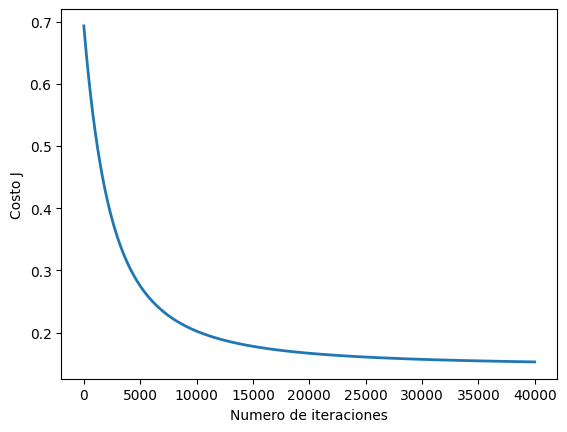

In [87]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 40000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))



In [88]:
print(X_test)
print(theta)

[[  13.     37.      0.   ...  -81.47    2.    100.  ]
 [  35.      7.      0.   ... -108.8     0.5    20.  ]
 [   4.      6.      0.   ... -111.42   10.    100.  ]
 ...
 [  28.      0.      1.   ...  -89.49    5.59  100.  ]
 [  12.      0.      1.   ...  -87.23    0.78   75.  ]
 [  37.      0.      0.   ...  -80.52    0.9    75.  ]]
[-3.01884399e+00 -2.78655586e-02 -2.11789658e-02 -1.28467486e-01
 -6.44533950e-03  1.11160375e-03 -5.06853248e-02 -9.33531949e-04
  1.18463594e-01 -1.95408487e-01 -2.51882129e-01  2.39395640e-01
  2.40686292e-02 -1.04646356e-01]


In [89]:
X_test = data.iloc[48001:, 8:-1].values
y_test = data.iloc[48001:, -1].values
print(X_test)

[[  13.     37.      0.   ...  -81.47    2.    100.  ]
 [  35.      7.      0.   ... -108.8     0.5    20.  ]
 [   4.      6.      0.   ... -111.42   10.    100.  ]
 ...
 [  28.      0.      1.   ...  -89.49    5.59  100.  ]
 [  12.      0.      1.   ...  -87.23    0.78   75.  ]
 [  37.      0.      0.   ...  -80.52    0.9    75.  ]]


In [90]:
# verificar si ingresa o no a la universidad
# X_array = [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46]
X_test_norm, mu, sigma = featureNormalize(X_test)
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)
aprueba = sigmoid(np.dot(X_test_norm, theta))   # Se debe cambiar esto
print(aprueba)
# print('Una persona con los siguientes datos [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46] tiene como probabilida de ser diabetico:{:.0f}'.format(aprueba))

[0.04755223 0.05964293 0.06209375 ... 0.04403835 0.04458872 0.0452301 ]


In [92]:
print(X_test_norm)
print(theta)
predict = sigmoid(np.dot(X_test_norm[0], theta))   # Se debe cambiar esto
print(predict)
print(y_test)

[[ 1.00000000e+00 -1.00725516e+00  7.70273462e-01 ...  5.41011536e-01
  -2.31499006e-01 -1.92634862e-01]
 [ 1.00000000e+00  4.69776017e-01 -3.01471110e-01 ... -1.15243298e+00
  -4.50647901e-01 -5.11259810e-01]
 [ 1.00000000e+00 -1.61149519e+00 -3.37195929e-01 ... -1.31477563e+00
   9.37295105e-01 -1.92634862e-01]
 ...
 [ 1.00000000e+00 -1.88449150e-04 -5.51544844e-01 ...  4.40695314e-02
   2.92997352e-01 -1.92634862e-01]
 [ 1.00000000e+00 -1.07439294e+00 -5.51544844e-01 ...  1.84105558e-01
  -4.09740107e-01 -2.92205158e-01]
 [ 1.00000000e+00  6.04051579e-01 -5.51544844e-01 ...  5.99876237e-01
  -3.92208196e-01 -2.92205158e-01]]
[-3.01884399e+00 -2.78655586e-02 -2.11789658e-02 -1.28467486e-01
 -6.44533950e-03  1.11160375e-03 -5.06853248e-02 -9.33531949e-04
  1.18463594e-01 -1.95408487e-01 -2.51882129e-01  2.39395640e-01
  2.40686292e-02 -1.04646356e-01]
0.04755222503278487
[0 0 0 ... 0 0 0]
